# Hands-on Dimensionality Reduction

**TODO:** add an intro and some text. 

## Some tricks as reference

Just here for reference

### Possible links:
- [PyTorch installation instructions](https://pytorch.org/)
- [dlsia (Deep Learning for Scientific Image Analysis)](https://dlsia.readthedocs.io/en/latest/)
- [scikit-learn for dimensional reductions modules](https://scikit-learn.org/stable/)
### Pointless gif
![](https://i.imgur.com/omuhqBt.gif)


## Imports

In [24]:
import os
import glob
from PIL import Image
import numpy as np

## Load data

Other libraries for loading image formats:

```python 
from tifffile import imread, imwrite
```
- accepts both **.tif** and **.tiff** extensions
- loads image in numpy array format




In [25]:
image_path = 'images/'

filenames = sorted(glob.glob(image_path + '*.jpg')) # Let's load filenames to file
print('Number of images: ', len(filenames))
print('First two images: ', filenames[:2])


Number of images:  400
First two images:  ['images/000001.jpg', 'images/000002.jpg']


In [26]:
from skimage import io

images = [] # An empty list as placeholder

for filename in filenames:
  img = io.imread(filename) # imread will load the image as a numpy array, which we will see shortly.
  images.append(img)

images = np.array(images) # We convert the list into a numpy array stack for easier processing lateres.shape

print('Data type:           ', type(images), images.dtype)
print('Shape of data:       ', images.shape)
print('Min pixel intensity: ', np.min(images[0]))
print('Max pixel intensity: ', np.max(images[0]))

Data type:            <class 'numpy.ndarray'> uint8
Shape of data:        (400, 64, 64)
Min pixel intensity:  28
Max pixel intensity:  255


## Normalize/Standardize data

**TODO:** cut down... hsowing way too much that's already been shown 

In [27]:
def min_max_normalize(image):

    min_val = np.min(image)
    max_val = np.max(image)
    print(f'Min pixel value in image: {min_val}')
    print(f'Max pixel value in image: {max_val}')

    print('------------------')
    normalized_image = (image - min_val) / (max_val - min_val)
    print(f'Min pixel value in normalized image: {np.min(normalized_image)}')
    print(f'Max pixel value in normalized image: {np.max(normalized_image)}')

    return normalized_image

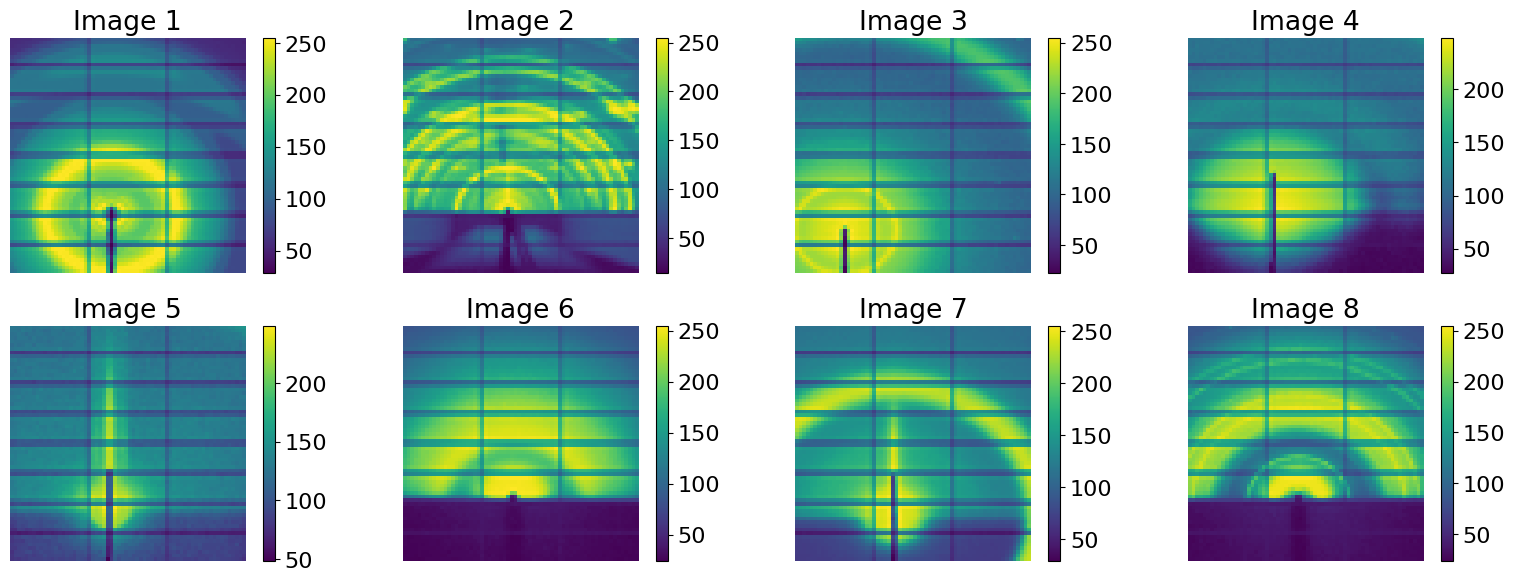

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 16})  # Change fontsize
for j in range(0, 8):
    plt.subplot(2, 4, j + 1)  # Create a 2x5 grid of subplots
    plt.imshow(images[j])
    plt.colorbar()
    plt.title(f"Image {j + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Min pixel value in image: 0
Max pixel value in image: 255
------------------
Min pixel value in normalized image: 0.0
Max pixel value in normalized image: 1.0


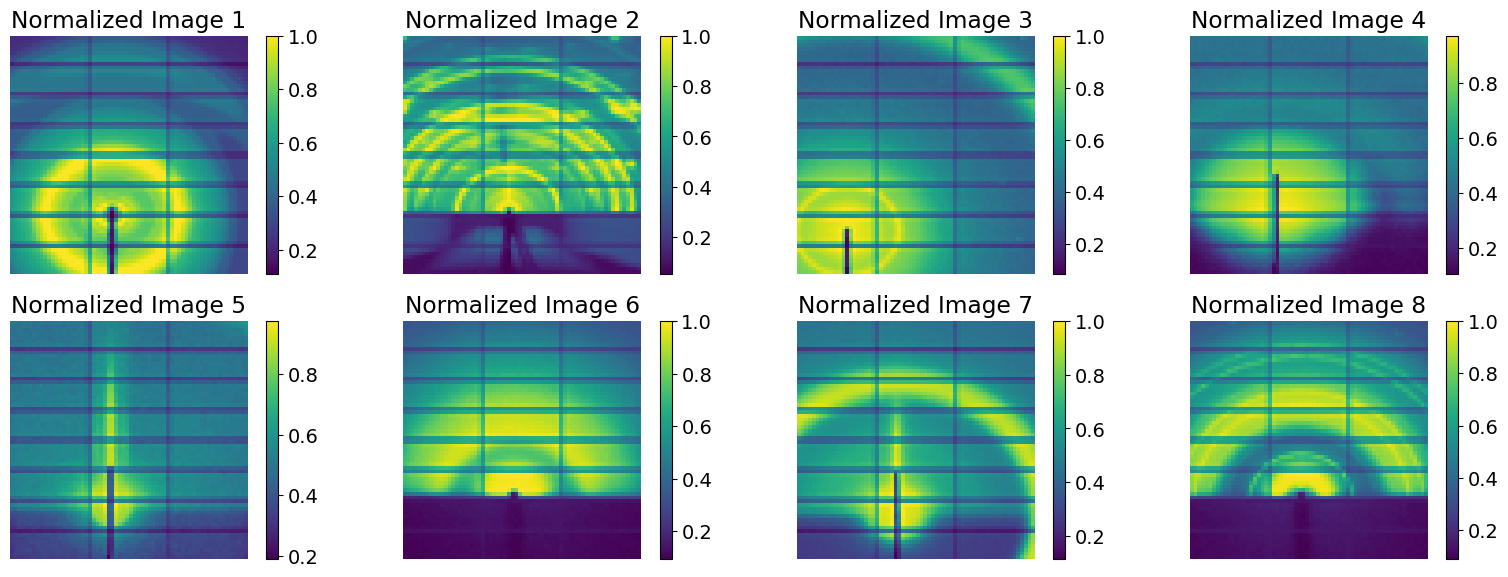

In [29]:
images_norm = min_max_normalize(images)

plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 14})  # Change fontsize
for j in range(0, 8):
    plt.subplot(2, 4, j + 1)  # Create a 2x5 grid of subplots
    plt.imshow(images_norm[j])
    plt.colorbar()
    plt.title(f"Normalized Image {j + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Principal Component Analysis

**Principal Component Analysis (PCA)** is a fundamental technique in the field of dimensionality reduction. 

By identifying the principal components, which are orthogonal vectors capturing the maximum variance in the data, PCA enables a compact representation of information while preserving its essential characteristics. PCA is used to transform high-dimensional data into a new, typically 2d coordinate system; i.e. each 64x64 pixel image is compressed to two or three real numbers.

Why reduce dimensionality?

- Aids in visualizing complex data.
- Enhances computational efficiency in various machine learning and statistical analysis tasks. 
- Overall simplifies data analysis and pattern recognition tasks.

Below, let's write a function to apply PCA to out image stack using the widely-used [scikit-learn machine learning library](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
def plot_me(reduced_data, category=None):
    
    if 'pca' in lower(category):
        title = 'PCA Results'; xtitle = 'Principal Component 1'; ytitle = 'Principal Component 2'
    elif ('umap' in lower(category)) or ('u-map' in lower(category)):
        title = 'U-Map Results'; xtitle = 'U-Map Dimension 1'; ytitle = 'U-Map Dimension 2'
    else:
        title = 'Dimensionality Reduction Results'; xtitle = 'Reduced Dimension 1'; ytitle = 'Reduced Dimension 2'
    
    plt.figure(figsize=(8, 5))
    plt.rcParams.update({'font.size': 12})
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
    plt.title(title); plt.xlabel(xtitle); plt.ylabel(ytitle)
    plt.show()
    
    return

In [34]:
from sklearn.decomposition import PCA

def perform_PCA(imgs, plot_me=True, title='PCA Results'):
        
    # Reshape the image stack to prepare for PCA
    reshaped_images = imgs.reshape(imgs.shape[0], -1)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(reshaped_images)
        
    if plot_me is True:
        # Create a scatter plot of PCA results
        plt.figure(figsize=(8, 5))
        plt.rcParams.update({'font.size': 12})  # Change fontsize
        plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(title)
        plt.show()

    return (pca_result)


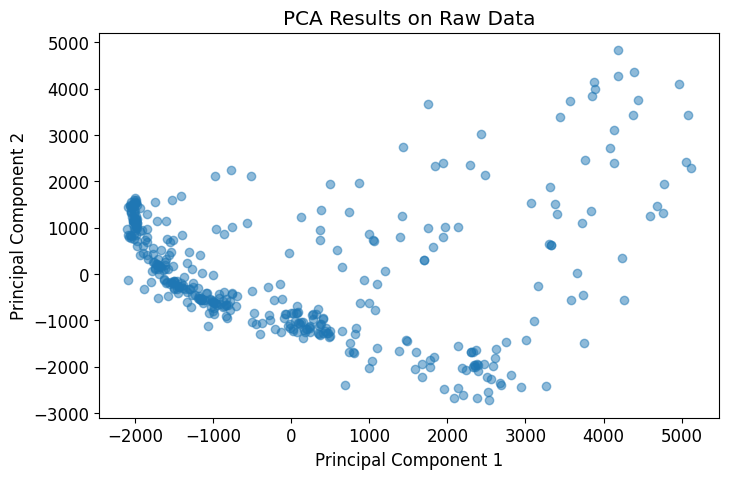

Resulting dimensions/shape of PCA output on raw data:  (400, 2)


In [35]:
images_pca = perform_PCA(images, title='PCA Results on Raw Data')

print('Resulting dimensions/shape of PCA output on raw data: ', images_pca.shape)

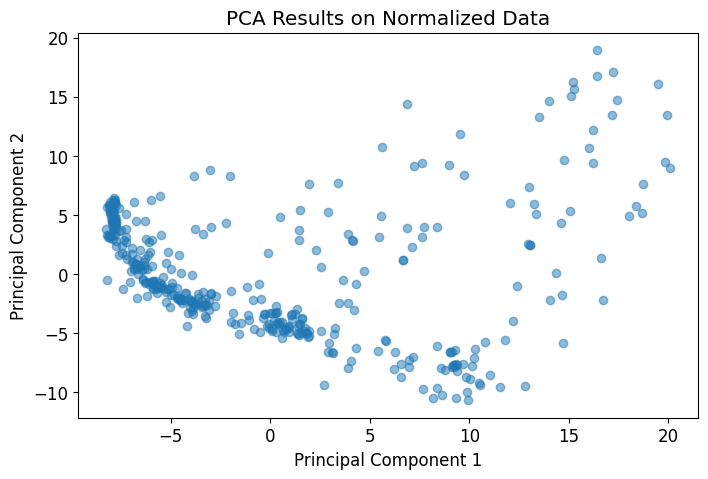

Resulting dimensions/shape of PCA output on normalized:  (400, 2)


In [36]:
images_norm_pca = perform_PCA(images_norm, title='PCA Results on Normalized Data')

print('Resulting dimensions/shape of PCA output on normalized: ', images_norm_pca.shape)

### Use case: PCA applied to grazing incident small x-ray scattering (GISAXS) data

[Liu, Shuai, et al](https://link.springer.com/content/pdf/10.1557/mrc.2019.26.pdf) use deep neural network to predict seven combinations of 3d nanoparticle lattice orientations form experimental data, then apply PCA to visualize the predicted image categorization.

**Pros:**
- Great for visualization and qualitative analysis
    - Clear separation for FCC (face-centered cubic)
    
**Cons:**
- May result in a lot of overlap
    - "First two components only contribute %65 of (variance)...overlapping might be separated in higher dimensional space."
    
<img src="https://static.cambridge.org/content/id/urn%3Acambridge.org%3Aid%3Aarticle%3AS2159685919000260/resource/name/S2159685919000260_figAb.jpeg" width=500/>


## t-Distributed Stochastic Neightbor Embedding

t-SNE is a great visualization tool, though it is mostly used for qualitative analysis. *The algorithm is much more subjective*, as it is stochastic in nature and relies heavily on a "perplexity" parameter related to the number of nearest neightbors.

Let's build a function to apply t-SNE. We will once again call from the [scikit-learn machine learning library](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 

In [61]:
from sklearn.manifold import TSNE

def perform_tSNE(imgs, perplexity=None,random_state=143, plot_me=True, title='t-SNE Results'):
        
    # Reshape the image stack to prepare for t-SNE
    reshaped_images = imgs.reshape(imgs.shape[0], -1)

    # Perform PCA
    if perplexity is None:
        tsne = TSNE(n_components=2)
    else:
        tsne = TSNE(n_components=2, perplexity=perplexity)
    tnse_result = tsne.fit_transform(reshaped_images)
        
    if plot_me is True:
        # Create a scatter plot of t-SNE results
        plt.figure(figsize=(8, 5))
        plt.rcParams.update({'font.size': 12})  # Change fontsize
        plt.scatter(tnse_result[:, 0], tnse_result[:, 1], alpha=0.5)
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.title(title)
        plt.show()

    return tsne_result

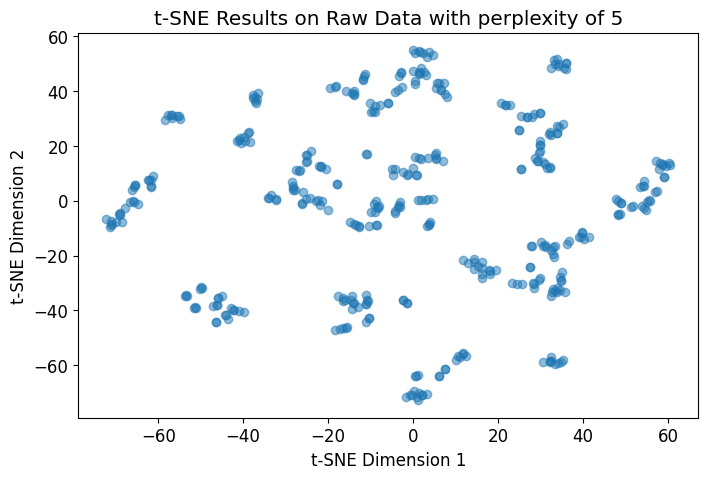

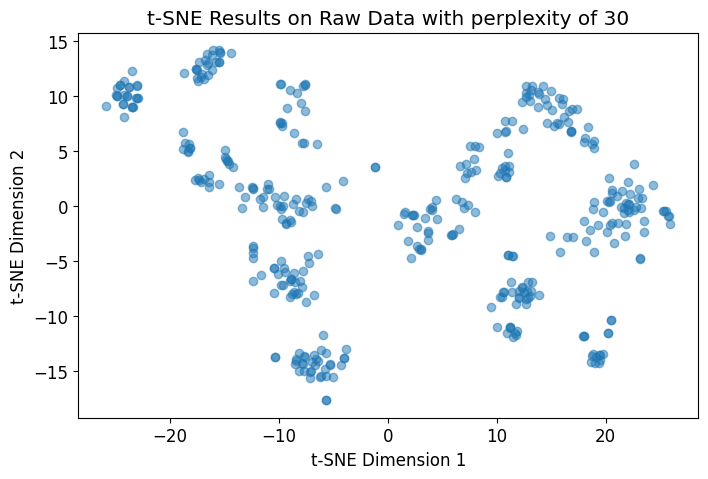

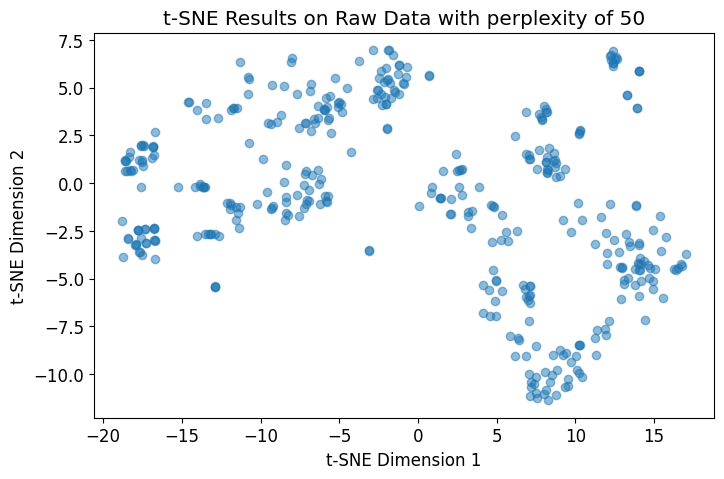

Resulting dimensions/shape of t-SNE output:  (400, 2)


In [68]:
images_tsne = perform_tSNE(images, perplexity=5.0,  title=f't-SNE Results on Raw Data with perplexity of 5')
_           = perform_tSNE(images, perplexity=30.0, title=f't-SNE Results on Raw Data with perplexity of 30')
_           = perform_tSNE(images, perplexity=50.0, title=f't-SNE Results on Raw Data with perplexity of 50')

print('Resulting dimensions/shape of t-SNE output: ', images_tsne.shape)

## Uniform Manifold Approximation and Projection (U-MAP)

<img src="https://umap-learn.readthedocs.io/en/latest/_images/logo_large.png" width=600/>

Some text about U-MAP and topological data analysis

Now we call the [U-MAP algorithm](https://umap-learn.readthedocs.io/en/latest/)

In [1]:
#import umap
!pip -q install umap-learn 

def perform_umap(imgs, n_neighbors=None, min_dist=None, plot_me=True, title='U-MAP Results'):
        
    # Reshape the image stack to prepare for U-MAP
    reshaped_images = imgs.reshape(imgs.shape[0], -1)

    # Perform U-MAP
    if n_neighbors is None and min_dist is None:
        umap_model = umap.UMAP(n_components=2)
    else:
        umap_model = umap.UMAP(n_components=2, 
                               n_neighbors=n_neighbors,
                               min_dist=min_dist)
    umap_result = umap_model.fit_transform(reshaped_images)
        
    if plot_me is True:
        # Create a scatter plot of PCA results
        plt.figure(figsize=(8, 5))
        plt.rcParams.update({'font.size': 12})  # Change fontsize
        plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
        plt.xlabel('U-MAP Dimension 1')
        plt.ylabel('U-MAP Dimension 2')
        plt.title(title)
        plt.show()

    return (umap_result)

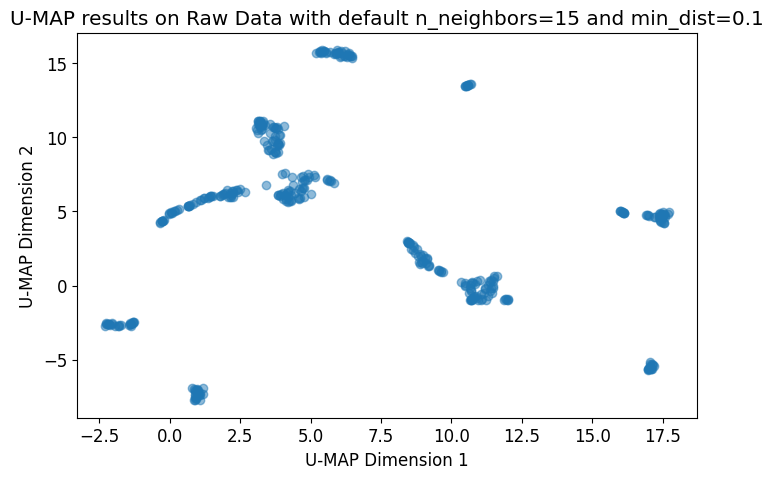

/home/ejroberts/anaconda3/envs/dlsia/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


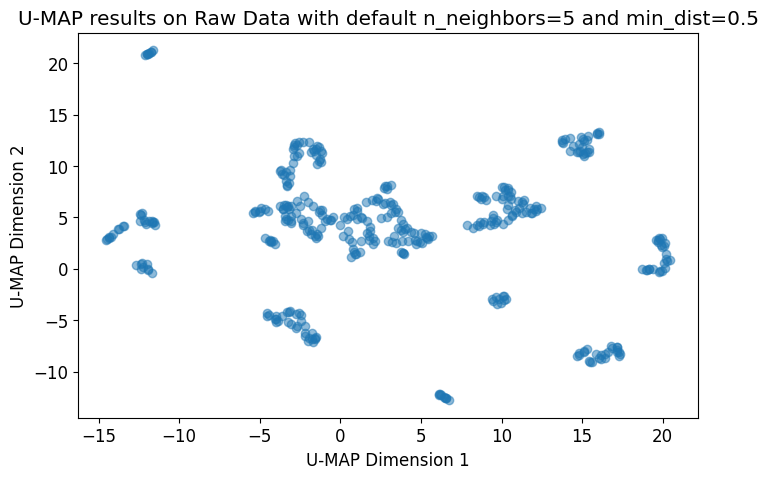

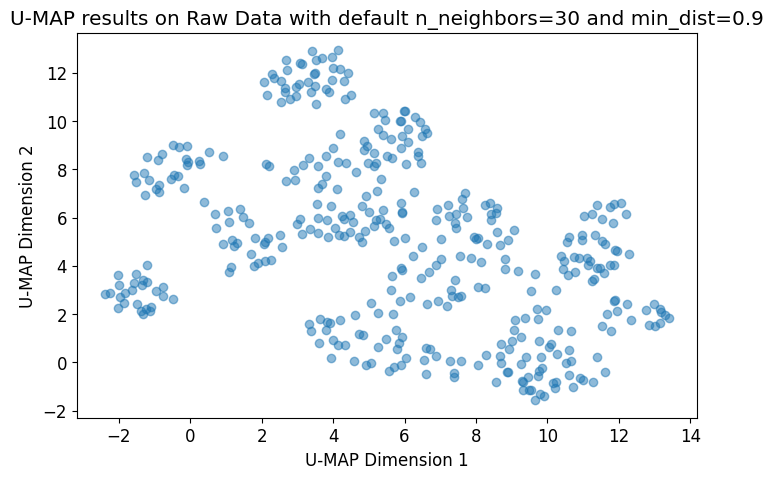

In [77]:
images_umap = perform_umap(images,
                           title=f'U-MAP results on Raw Data with default n_neighbors=15 and min_dist=0.1')
_           = perform_umap(images, n_neighbors=5, min_dist=0.5, 
                           title=f'U-MAP results on Raw Data with default n_neighbors=5 and min_dist=0.5')
_           = perform_umap(images, n_neighbors=30, min_dist=0.9, 
                           title=f'U-MAP results on Raw Data with default n_neighbors=30 and min_dist=0.9')

## Extra or Unused Cells

Here is some extra stuff I probably won't end up using.

### Standardizing Data

Min pixel value in image: 0
Max pixel value in image: 255
Mean in image: 123.08748291015625
Standard deviation in image: 59.46960614048239
------------------
Min pixel value in standardized_image: -2.0697544661619616
Max pixel value in standardized_image: 2.218150172009424
Mean in standardized_image: -5.814793091474258e-17
Standard deviation in standardized_image: 1.0000000000000002


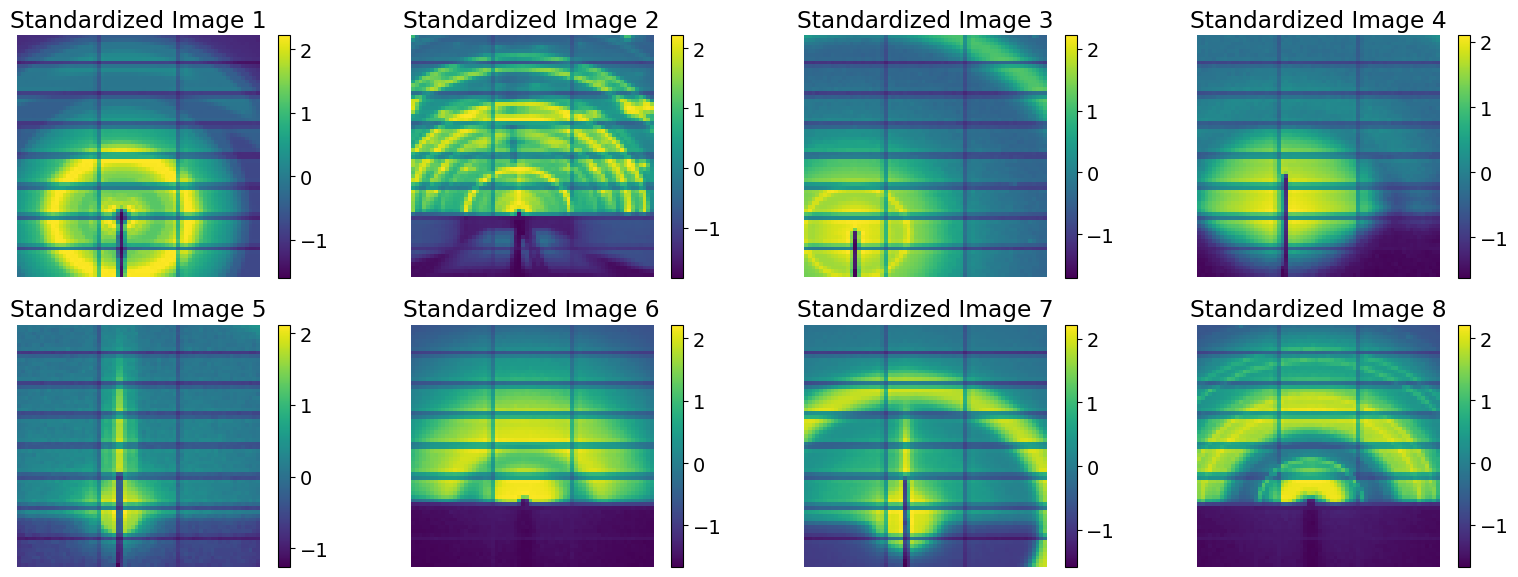

In [128]:
def standardize(image):

    mean = np.mean(image)
    std = np.std(image)
    print(f'Min pixel value in image: {np.min(image)}')
    print(f'Max pixel value in image: {np.max(image)}')
    print(f'Mean in image: {mean}')
    print(f'Standard deviation in image: {std}')

    print('------------------')

    standardized_image = (image - mean) / std
    print(f'Min pixel value in standardized_image: {np.min(standardized_image)}')
    print(f'Max pixel value in standardized_image: {np.max(standardized_image)}')
    print(f'Mean in standardized_image: {np.mean(standardized_image)}')
    print(f'Standard deviation in standardized_image: {np.std(standardized_image)}')

    return standardized_image
images_std  = standardize(images)

plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 14})  # Change fontsize
for j in range(0, 8):
    plt.subplot(2, 4, j + 1)  # Create a 2x5 grid of subplots
    plt.imshow(images_std[j])
    plt.colorbar()
    plt.title(f"Standardized Image {j + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## PCA: 1, 2, vs 3 Principal Components

Resulting dimensions/shape of PCA output:  (400, 1)


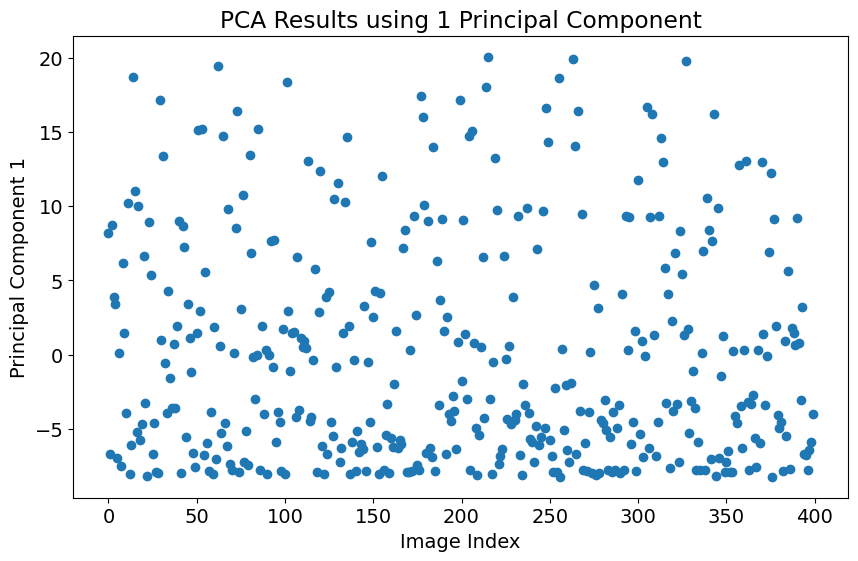

Resulting dimensions/shape of PCA output:  (400, 2)


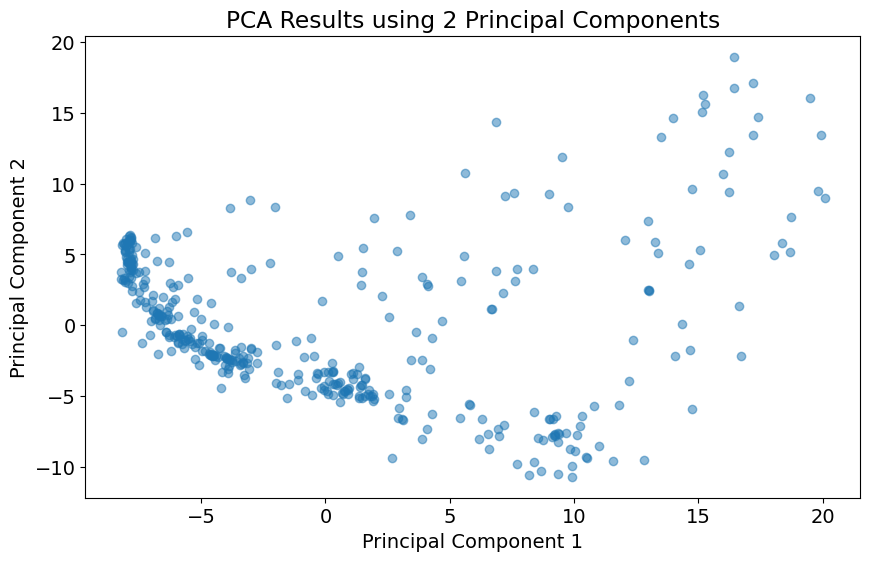

Resulting dimensions/shape of PCA output:  (400, 3)


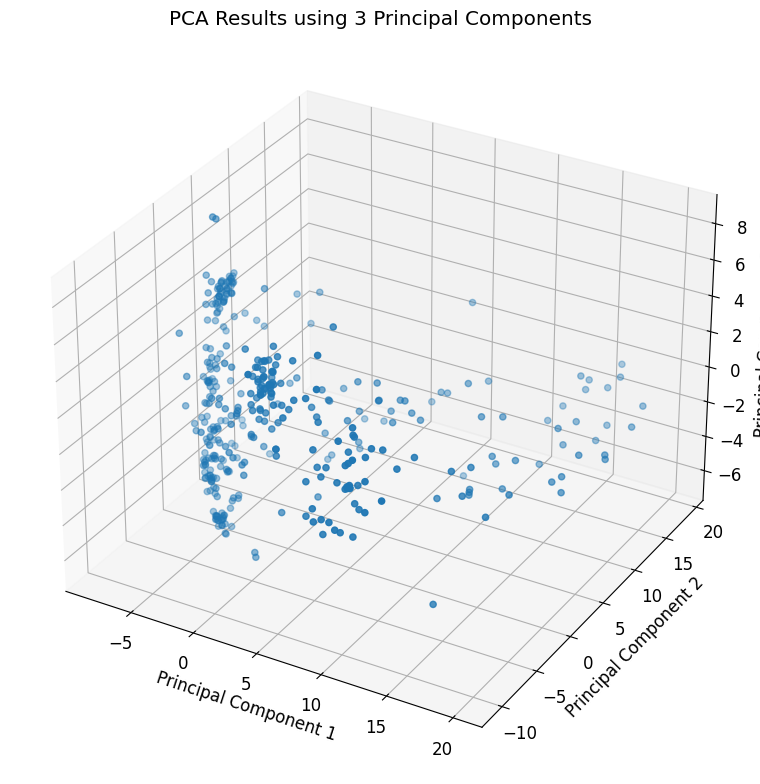

In [126]:
def perform_PCA_old(imgs, n_components=2, plot_me=True, title='PCA Results'):
    
    if n_components > 3:
        raise ValueError('Expected n_components equal to 1, 2, or 3')
        
    # Reshape the image stack to prepare for PCA
    reshaped_images = imgs.reshape(imgs.shape[0], -1)

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(reshaped_images)
        
    if plot_me is True:
        # Create a scatter plot of PCA results
        if n_components == 2:
            plt.figure(figsize=(10, 6))
            plt.rcParams.update({'font.size': 14})  # Change fontsize
            plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.title(title)
            plt.show()
        elif n_components == 3:
            plt.figure(figsize=(8, 8))
            plt.rcParams.update({'font.size': 12})  # Change fontsize
            ax = plt.axes(projection ="3d")
            ax.scatter3D(pca_result[:, 0], pca_result[:, 1], pca_result[:,2])
            ax.set_xlabel('Principal Component 1')
            ax.set_ylabel('Principal Component 2')
            ax.set_zlabel('Principal Component 3')

            plt.title(title)
            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=(10, 6))
            plt.rcParams.update({'font.size': 14})  # Change fontsize
            plt.plot(pca_result[:, 0], '.', markersize=12)
            plt.xlabel('Image Index')
            plt.ylabel('Principal Component 1')
            plt.title(title)
            plt.show()
    return (pca_result)

perform_PCA_old(images_norm, n_components=1, title='PCA Results using 1 Principal Component')

perform_PCA_old(images_norm, title='PCA Results using 2 Principal Components')

perform_PCA_old(images_norm, n_components=3, title='PCA Results using 3 Principal Components')